<a href="https://colab.research.google.com/github/Afsoon-Ghazanfari/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
#Connecting to the Google Drive and creating dataframes
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/My Drive/Customer_Churn_Prediction/train.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


#Exploratory Data Analysis

In [41]:
df.shape

(4250, 20)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.isnull().sum()
#There isn't any null data

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

<Axes: xlabel='churn', ylabel='count'>

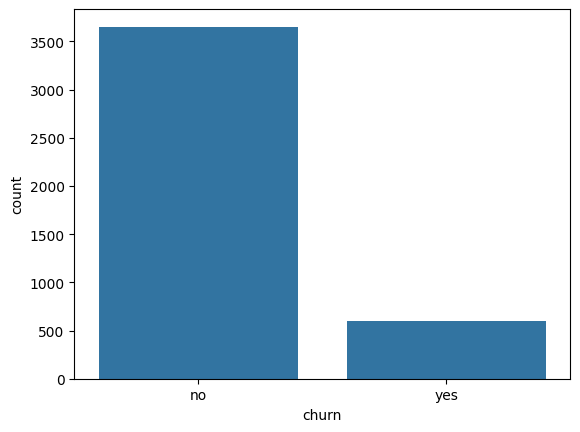

In [8]:
sns.countplot(x=df['churn'])

In [9]:
#percentage of costumer churn
churn_persentage=len(df[df['churn']=='yes'])/len(df)
churn_persentage

0.14070588235294118

In [10]:
#according to the countplot and churn_persentage, the dataset is unbalanced

In [88]:
numeric_df = df.select_dtypes(include=[np.number]).columns
print(numeric_df)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


<Axes: >

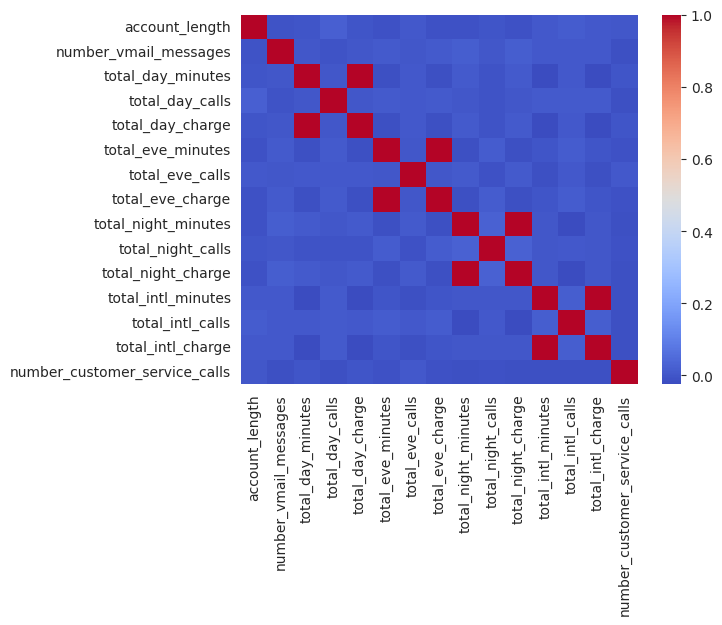

In [89]:
sns.heatmap(df[numeric_df].corr(), cmap='coolwarm')

In [90]:
#Dropping fully correlated columns as they have same information
df.drop(['total_day_minutes', 'total_eve_minutes' , 'total_night_minutes' , 'total_intl_minutes'],axis = 1, inplace = True)

<Axes: >

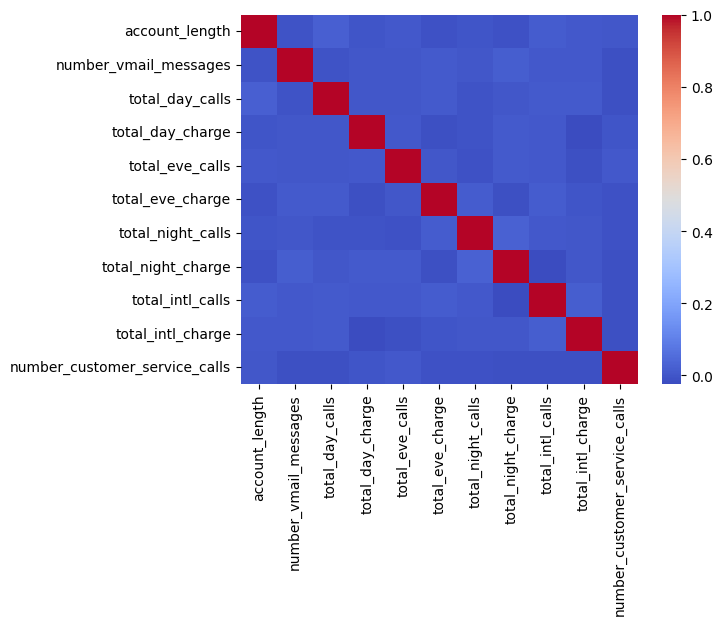

In [56]:
#Heatmap after deleting correlate columns
sns.heatmap(df[df.select_dtypes(include=[np.number]).columns].corr(), cmap='coolwarm')

# Non Numerical Data Visualization

In [91]:
non_numeric_columns=df.select_dtypes(exclude=[np.number]).columns
non_numeric_columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

<ipython-input-155-5e2f6331a40f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='state', palette="husl")


<Axes: xlabel='state', ylabel='count'>

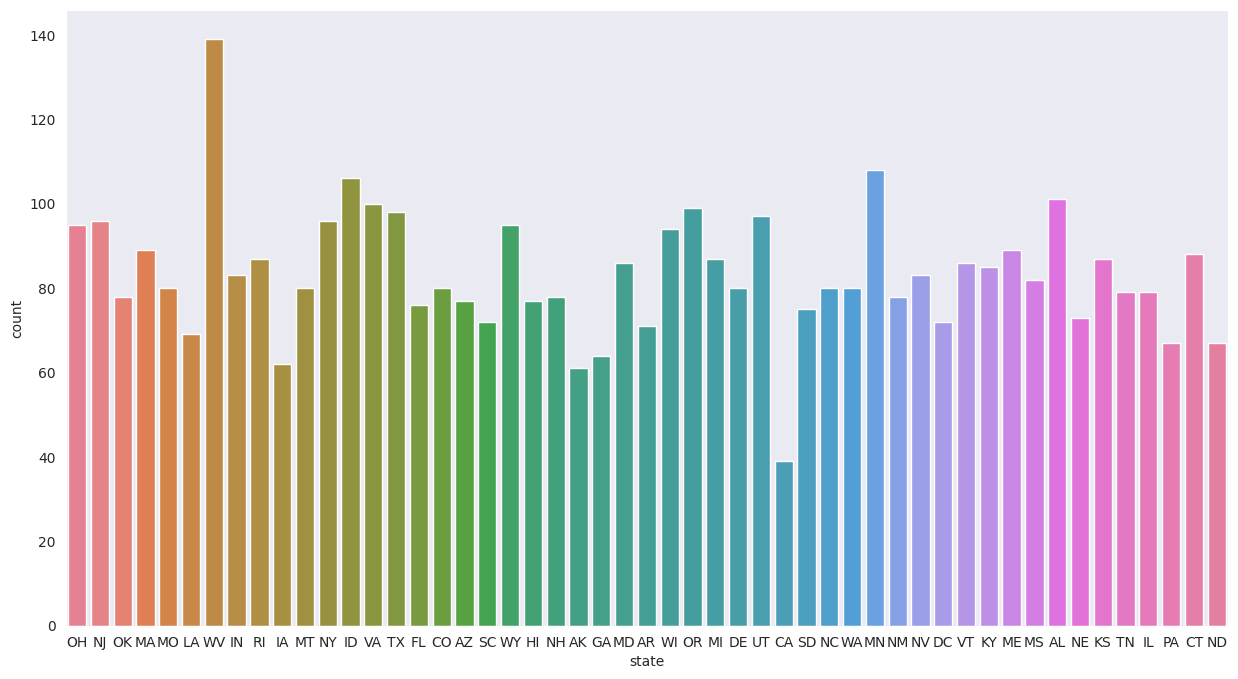

In [155]:
plt.figure(figsize= (15,8))
sns.countplot(df, x='state', palette="husl")

In [139]:
# Function to annotate percentages on the bars
def annotate_percentages(ax):
    for p in ax.patches:
        total = len(df)
        height = p.get_height()
        percentage = f'{height / total:.1%}'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

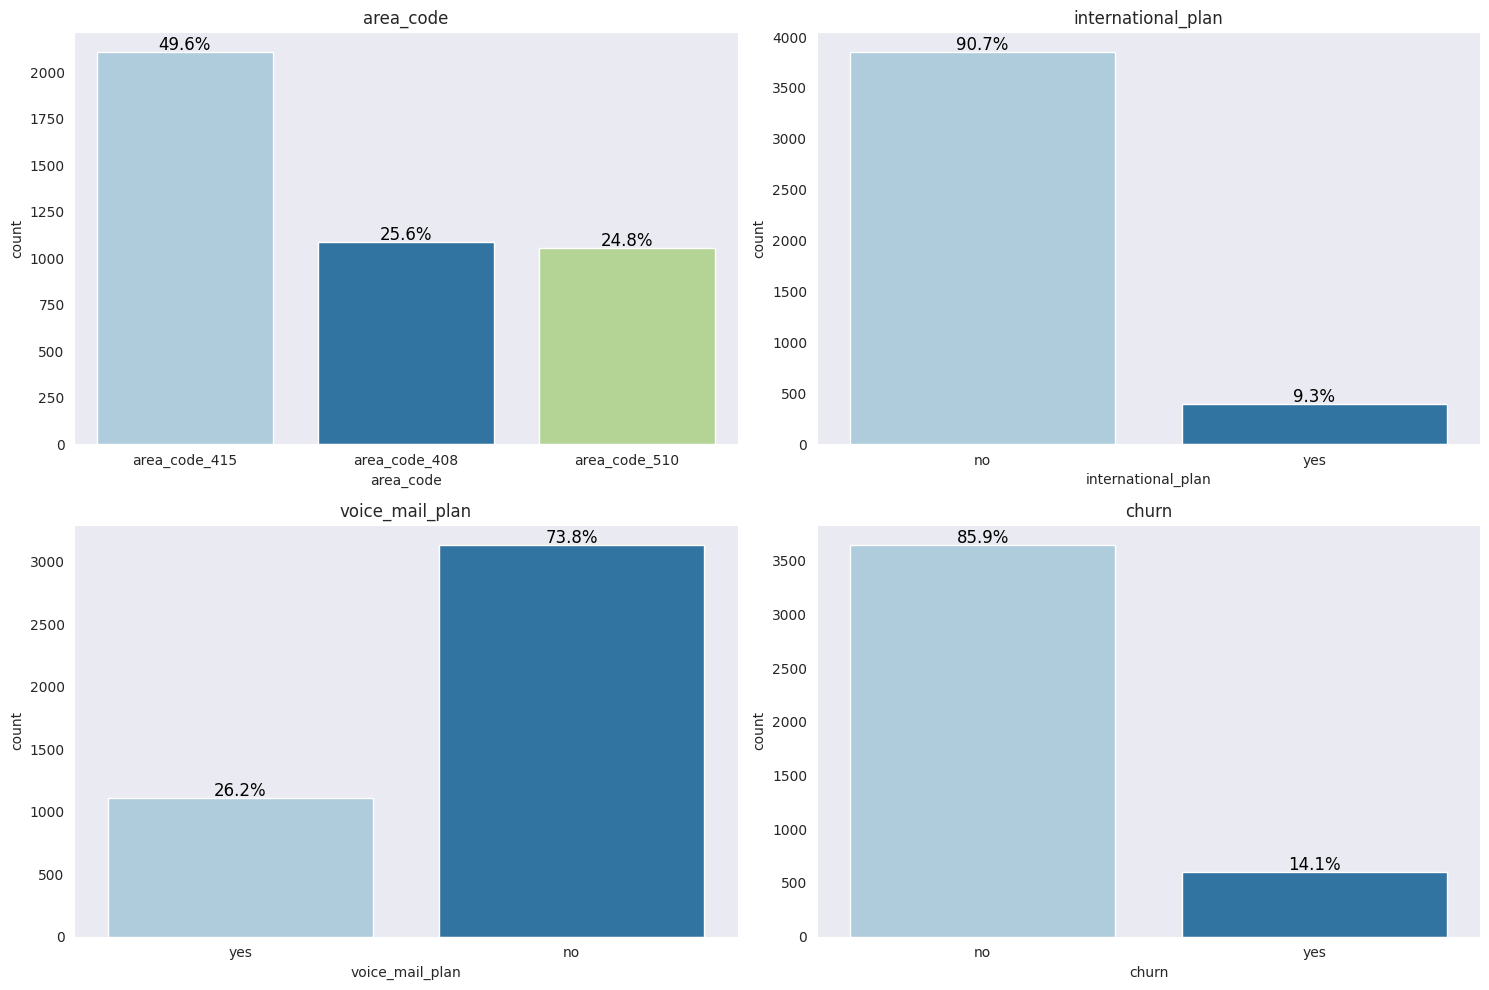

In [140]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax1=sns.countplot(data=df, x='area_code', hue='area_code', palette="Paired")
plt.title('area_code')
annotate_percentages(ax1)

plt.subplot(2,2,2)
ax2=sns.countplot(data=df, x='international_plan', hue='international_plan', palette="Paired")
plt.title('international_plan')
annotate_percentages(ax2)

plt.subplot(2,2,3)
ax3=sns.countplot(data=df, x='voice_mail_plan', hue='voice_mail_plan', palette="Paired")
plt.title('voice_mail_plan')
annotate_percentages(ax3)

plt.subplot(2,2,4)
ax4=sns.countplot(data=df, x='churn', hue='churn', palette="Paired")
plt.title('churn')
annotate_percentages(ax4)

plt.tight_layout()
plt.show()

#Numerical Data Visualization

In [157]:
new_numeric_df = df.select_dtypes(include=[np.number]).columns
print(new_numeric_df)

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')


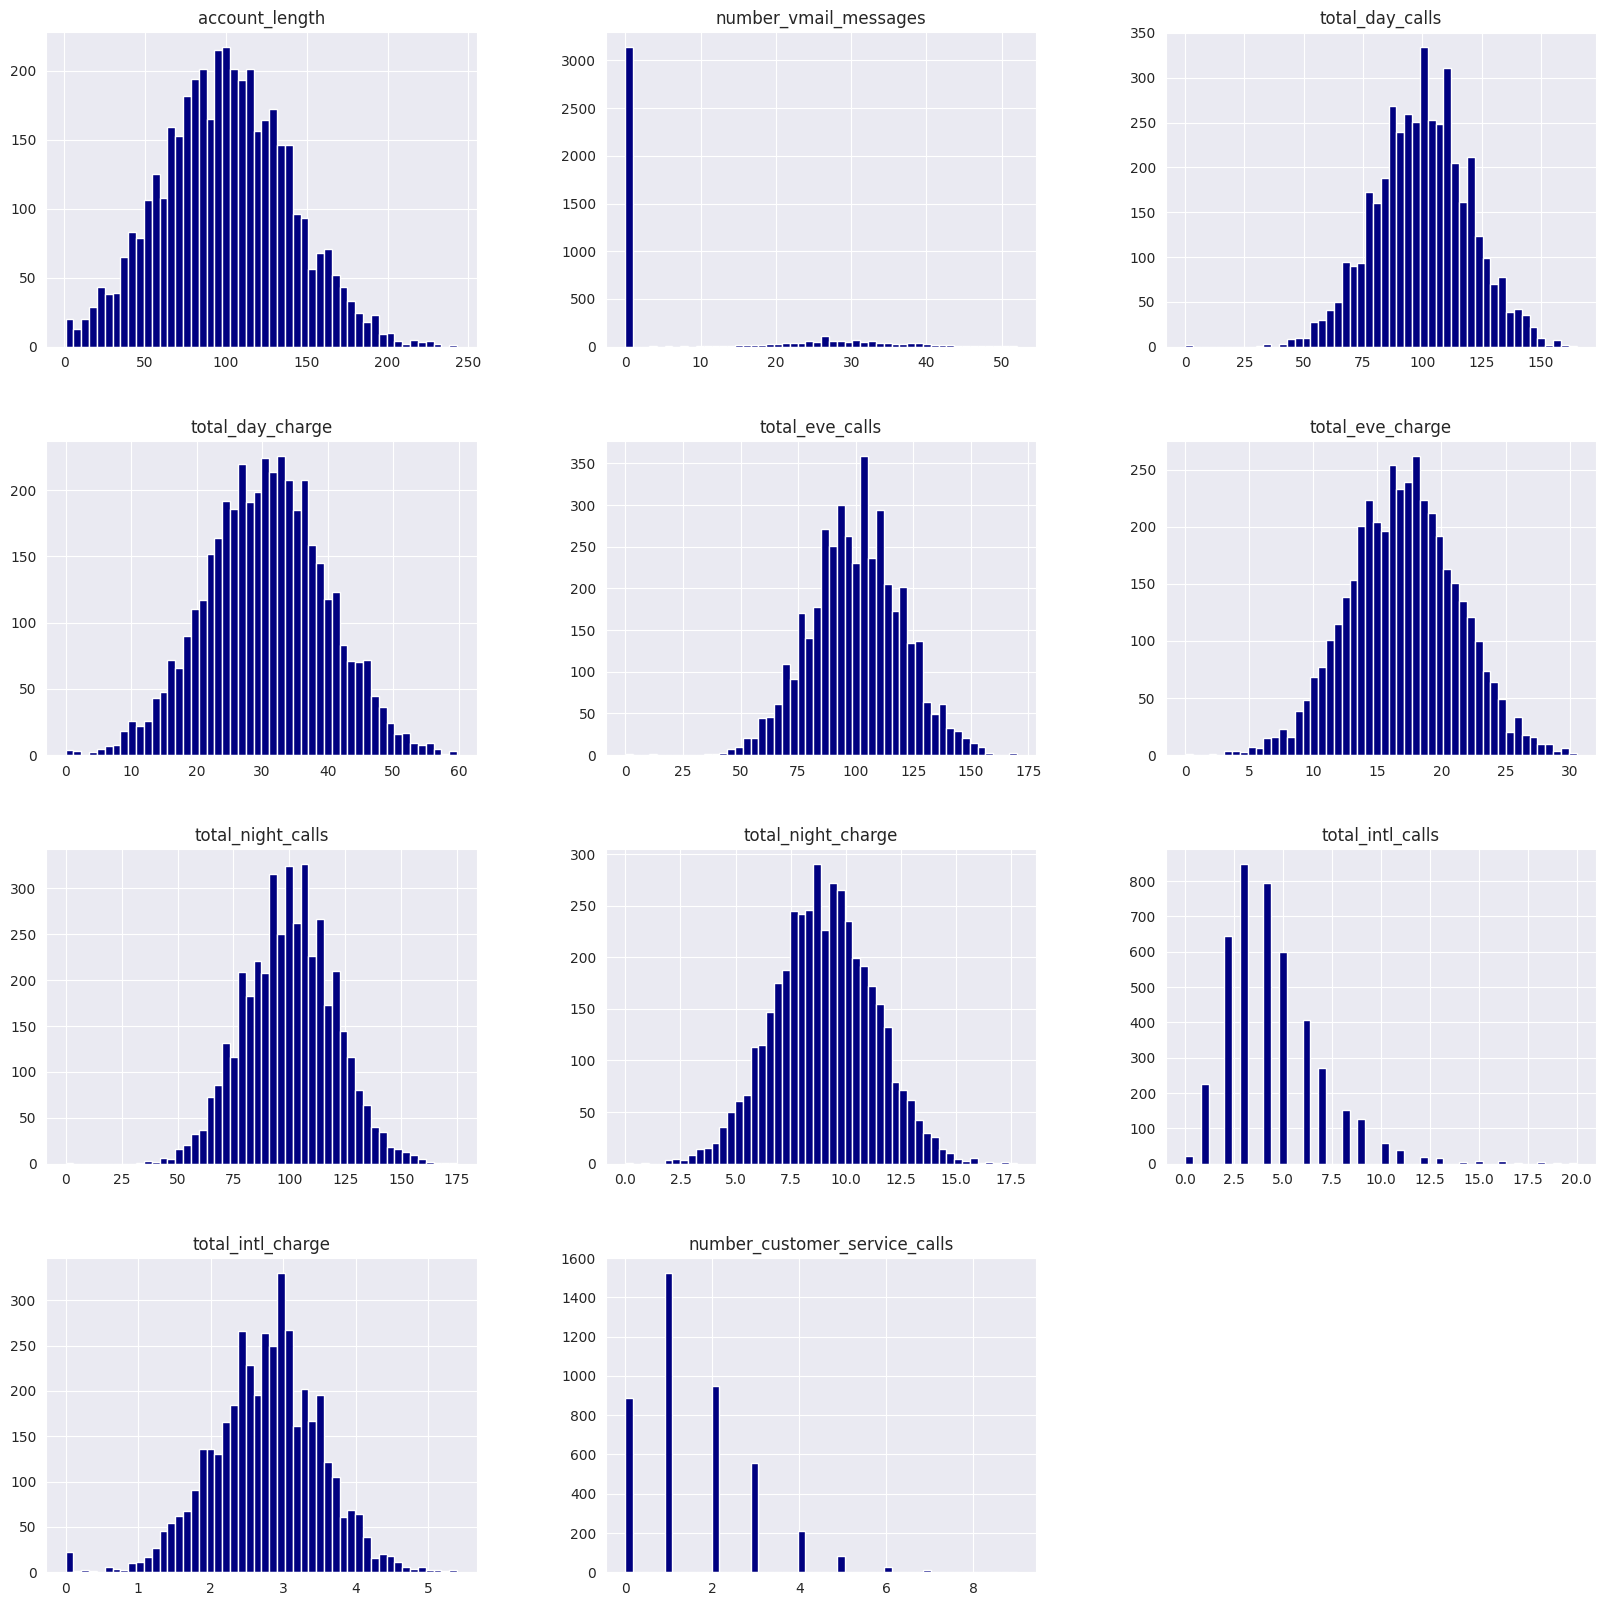

In [158]:
sns.set_style('dark')
df[new_numeric_df].hist(bins=50, figsize=(20,20), color='navy')
plt.show()

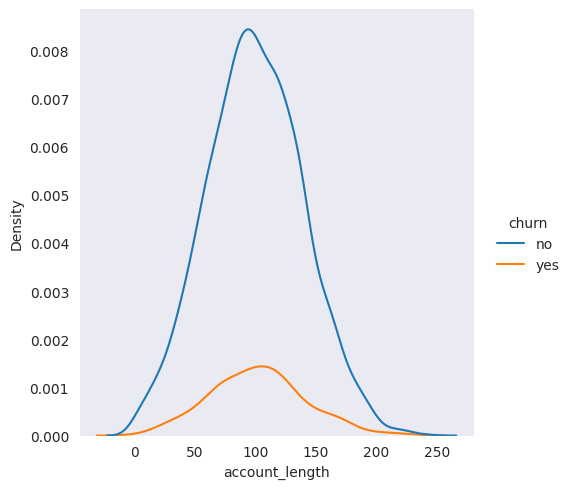

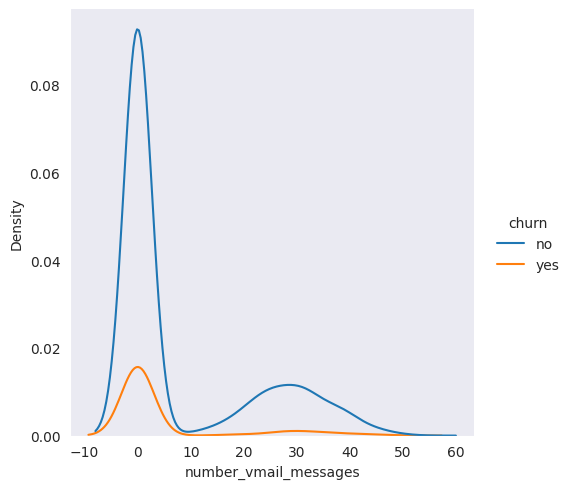

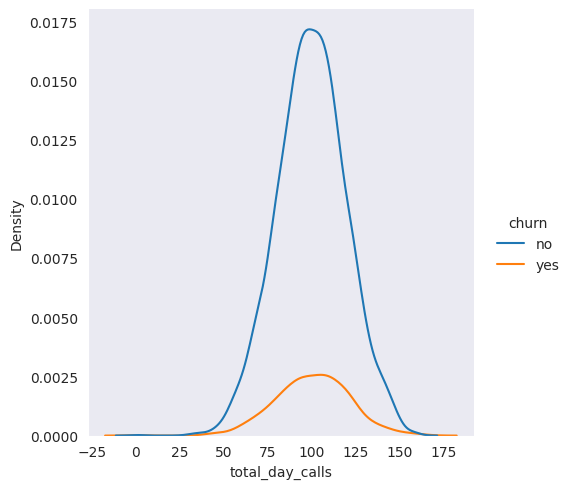

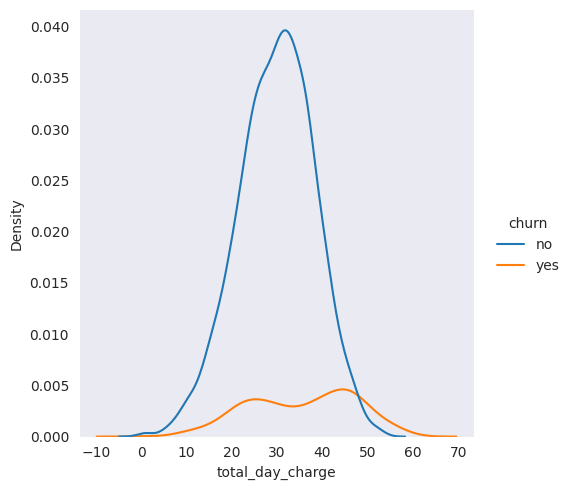

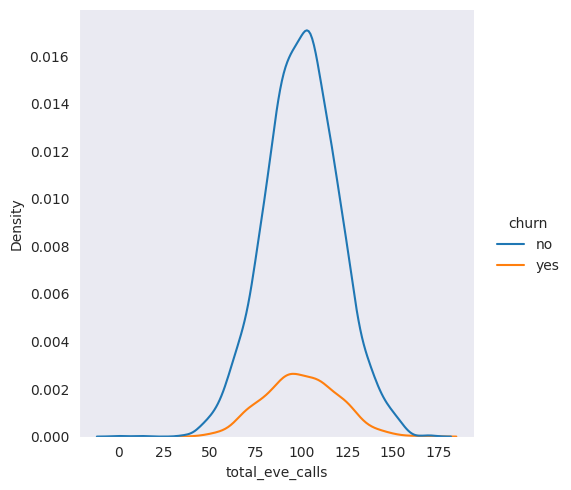

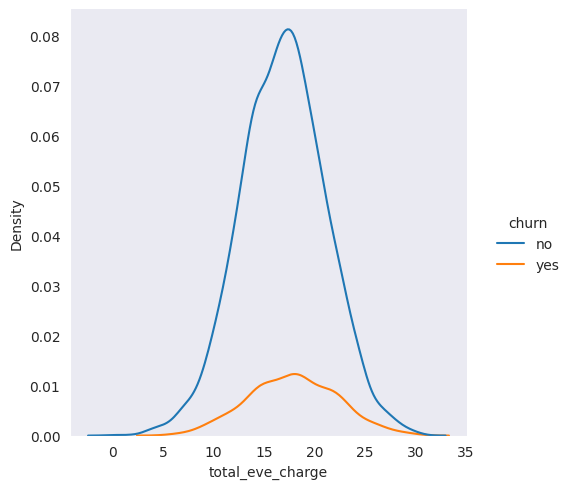

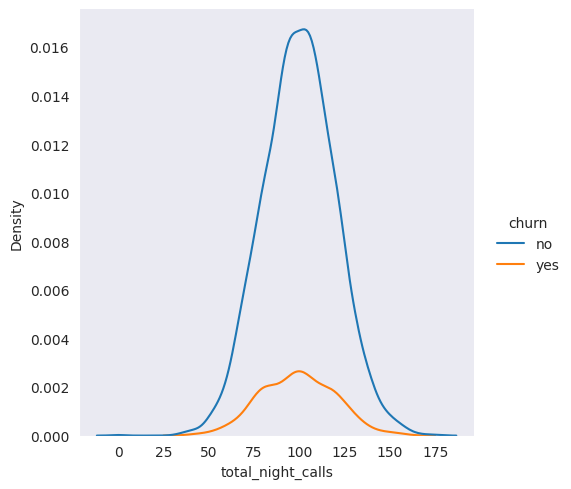

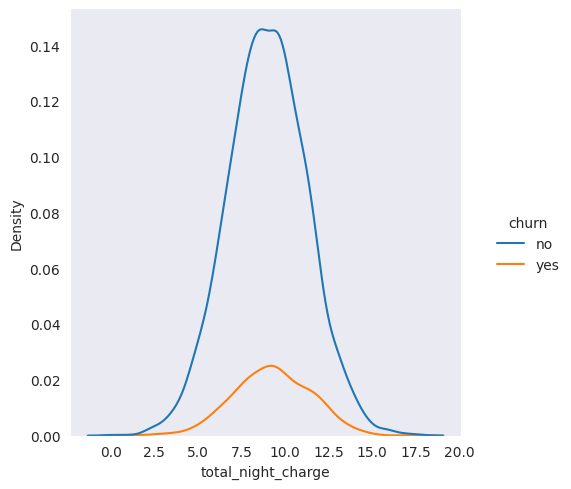

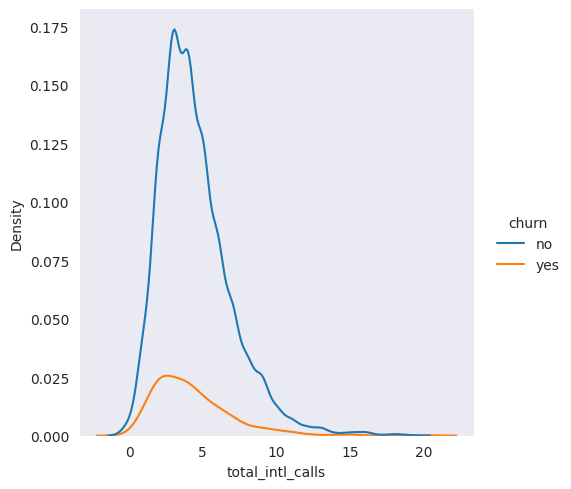

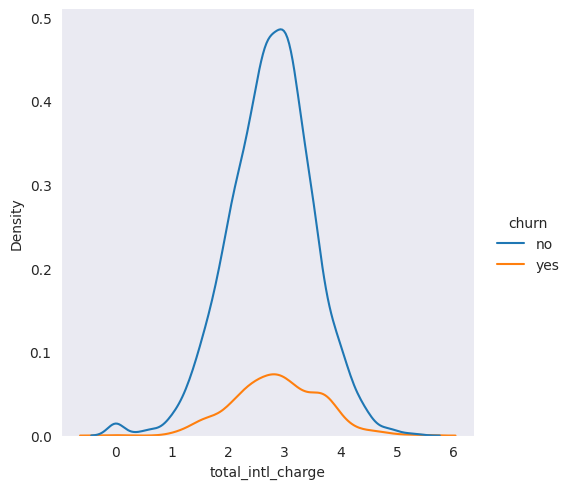

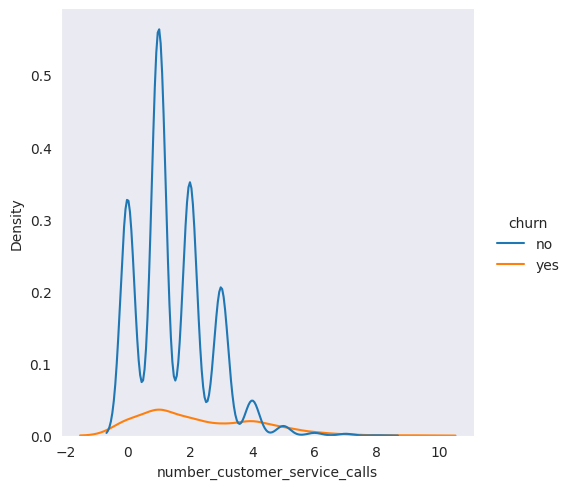

In [166]:
for feature in new_numeric_df:
  sns.displot(df , x = feature , hue = 'churn' , kind = 'kde')

In [68]:
#Converting objects to
df.state = pd.Categorical(df.state).codes
df.area_code=pd.Categorical(df.area_code).codes
df.international_plan=pd.Categorical(df.international_plan).codes
df.voice_mail_plan=pd.Categorical(df.voice_mail_plan).codes
df.churn=pd.Categorical(df.churn).codes

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int8   
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int8   
 3   international_plan             4250 non-null   int8   
 4   voice_mail_plan                4250 non-null   int8   
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_calls                4250 non-null   int64  
 7   total_day_charge               4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_calls              4250 non-null   int64  
 11  total_night_charge             4250 non-null   float64
 12  total_intl_calls               4250 non-null   i